In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("/content/sample_data/international-airline-passengers.csv",parse_dates=["Month"],index_col="Month")

In [4]:
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


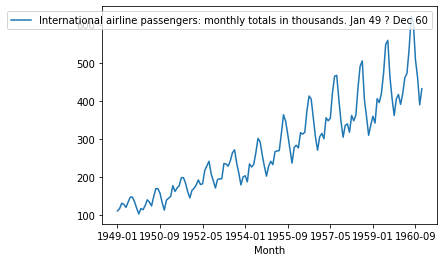

In [5]:
df.plot()

In [7]:
df.shape

(145, 1)

In [6]:
size=int(df.shape[0]*0.8)
size

116

In [9]:
train=df.iloc[:size]
train.shape
test=df.iloc[size:]
test.shape

(29, 1)

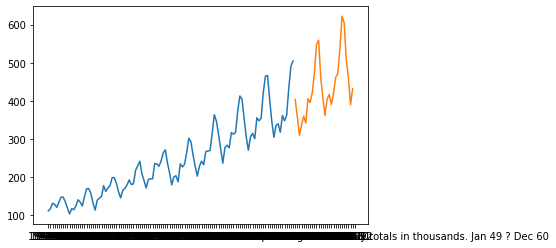

In [14]:
plt.plot(train)
plt.plot(test)

In [15]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
mx.fit(train)
sc_train=mx.transform(train)
sc_test=mx.transform(test)

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model=Sequential()
lstm_model.add(LSTM(200,activation='relu',input_shape=(10,1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse')

lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [63]:
from keras.preprocessing.sequence import TimeseriesGenerator
gen=TimeseriesGenerator(sc_train,sc_train,length=10,batch_size=1)

In [64]:
lstm_model.fit_generator(gen,epochs=20)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
106/106 [==============================] - 2s 9ms/step - loss: 0.0223
Epoch 2/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0168
Epoch 3/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0190
Epoch 4/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0130
Epoch 5/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0116
Epoch 6/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0119
Epoch 7/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0131
Epoch 8/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0112
Epoch 9/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0091
Epoch 10/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0096
Epoch 11/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0124
Epoch 12/20
106/106 [==============================] - 1s 9ms/step - loss: 0.0088
Epoch 13/20
106/106 [====

([<matplotlib.axis.XTick at 0x7f00b547c190>,
 <a list of 20 Text major ticklabel objects>)

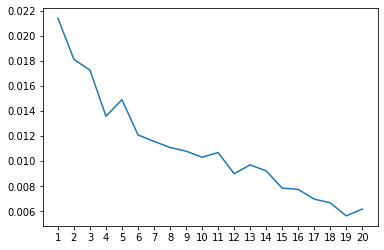

In [65]:
loss=lstm_model.history.history["loss"]
plt.plot(range(1,len(loss)+1),loss)
plt.xticks(range(1,len(loss)+1))

In [67]:
pred = []

batch = sc_train[-10:]
current_batch = batch.reshape((1, 10, 1))

for i in range(len(test)):   
    tpred = lstm_model.predict(current_batch)[0]
    pred.append(tpred) 
    current_batch = np.append(current_batch[:,1:,:],[[tpred]],axis=1)
  

In [68]:
pred

[array([0.85883355], dtype=float32),
 array([0.7659836], dtype=float32),
 array([0.6677324], dtype=float32),
 array([0.57858926], dtype=float32),
 array([0.5560475], dtype=float32),
 array([0.5465802], dtype=float32),
 array([0.59969294], dtype=float32),
 array([0.7043442], dtype=float32),
 array([0.8254353], dtype=float32),
 array([0.9154904], dtype=float32),
 array([0.92799133], dtype=float32),
 array([0.89518493], dtype=float32),
 array([0.815468], dtype=float32),
 array([0.7135611], dtype=float32),
 array([0.62163836], dtype=float32),
 array([0.5569347], dtype=float32),
 array([0.54928946], dtype=float32),
 array([0.5983778], dtype=float32),
 array([0.694981], dtype=float32),
 array([0.8000772], dtype=float32),
 array([0.878601], dtype=float32),
 array([0.91844016], dtype=float32),
 array([0.90848804], dtype=float32),
 array([0.8489076], dtype=float32),
 array([0.7593883], dtype=float32),
 array([0.6598046], dtype=float32),
 array([0.5856264], dtype=float32),
 array([0.5639793], dt

In [69]:
lstm_predictions = mx.inverse_transform(pred)
lstm_predictions

array([[448.39225411],
       [411.1594162 ],
       [371.76069945],
       [336.01429349],
       [326.97504717],
       [323.17865837],
       [344.47686923],
       [386.44202942],
       [434.9995476 ],
       [471.11164594],
       [476.12452358],
       [462.96915859],
       [431.00267333],
       [390.13800818],
       [353.27698141],
       [327.33082044],
       [324.26507545],
       [343.94950736],
       [382.68737257],
       [424.83095717],
       [456.31900686],
       [472.29450542],
       [468.30370212],
       [444.41194355],
       [408.51471937],
       [368.58163762],
       [338.83619577],
       [330.1557104 ],
       [344.13115847]])

In [70]:
test_df=test
test_df['LSTM_Predictions'] = lstm_predictions
test_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,LSTM_Predictions
Month,,
1958-09,404.0,448.392254
1958-10,359.0,411.159416
1958-11,310.0,371.760699
1958-12,337.0,336.014293
1959-01,360.0,326.975047


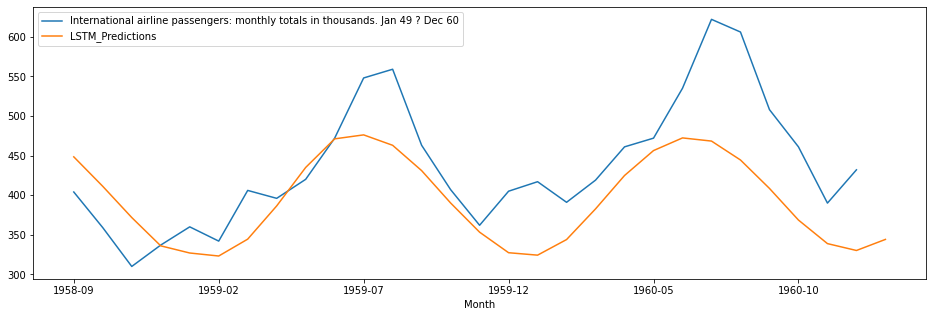

In [71]:
test_df['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'].plot(figsize = (16,5), legend=True)
test_df['LSTM_Predictions'].plot(legend = True)